# Narrative Flow of Men and Women



 ### Hypothesis:

Men and women discuss sociability and solidarity in different ways, i.e. in different contexts. (..) Solidarity and social relations were different in the men and women section of Birkenau; men and women recall them in different ways and contexts. In practice, this means that they are primed and followed by different topics in the narratives of men and women.

If the hypothesis is true:
- the story line (or narrative flow) leading to the discussion of sociability and solidarity is different in testimonies of men and women
- the most likely sequences of topics (to be named narrative pathway) leading to topics describing solidarity and sociability are different
- different amount of traffic is going through  similar pathways leading to solidarity and sociability
- different nodes (to be named priming topics) are preceding and following (to be named exit topics) topics of solidarity and sociability


Key research questions to be studied here:
- What are the major pathways between the memory of arrival to Birkenau and leaving from Birkenau?
- How are nodes related to solidarity (food sharing, aid giving) and social bonds (friends, social bonds, family) are situated along the major pathways? For women and men, are they peripheral or central? I.e. do a significant amount of narrative flow go towards them for men and women?
- What are the exit and priming topics for solidarity (food sharing, aid giving) and social bonds for men and women?
- How are these topics related to survival explanations?
- How is friendship related to aid giving for men and for women? What are the transitory topics between them?
- What are those topics that prime topics of solidarity and social bonds?
- Where did solidarity take place? In what contexts did solidarity take place?
- What topics do topics related to solidarity and social bonds prime for men and women?


In [1]:
import constants
import pandas as pd
import os
from IPython.display import display
import json
import pyemma
from tables import *
import sys; sys.path.insert(0, '..')
from markov_modelling.markov_utils import *

## Load the relevant data

In [2]:
input_directory = constants.output_data_markov_modelling
path = os.getcwd()
parent = os.path.abspath(os.path.join(path, os.pardir))
input_directory = parent +'/'+ constants.output_data_markov_modelling
data_set_1_w  = pyemma.load(input_directory+'complete_w'+'/'+'pyemma_model','simple')
data_set_1_complete  = pyemma.load(input_directory+'complete'+'/'+'pyemma_model','simple')
data_set_1_m = pyemma.load(input_directory+'complete_m'+'/'+'pyemma_model','simple')
data_set_1_complete = pyemma.load(input_directory+'complete'+'/'+'pyemma_model','simple')
input_directory = parent +'/'+ constants.output_data_segment_keyword_matrix
features_df = pd.read_csv(input_directory+constants.output_segment_keyword_matrix_feature_index)


## Observation 1

### Qualitative description

Both men and women discuss aid giving in the context of camp living conditions and forced labour, women are more likely to discuss it in the context of camp living conditions. While men are more likely to discuss it in the context of forced labour.

In [3]:
story_start = 'arrival'
story_end = 'aid giving'
state_index = features_df.KeywordLabel.to_list()
flux = 1

In [4]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Path flux		%path	%of total	path
arrival-selections-aid giving
5.771371591305262
arrival-intake procedures-forced labor-aid giving
3.7069688054162238
arrival-intake procedures-living conditions-aid giving
3.677430827013225
arrival-selections-intake procedures-mass murder awareness-aid giving
3.381045436955358
arrival-selections-intake procedures-Appell-food-aid giving
2.74928190394177
arrival-intake procedures-prisoner tattoos (stills)-forced labor-aid giving
2.676092270601696
arrival-loved ones' separations-intake procedures-aid giving
2.5303850970717705
arrival-selections-camp adaptation methods-aid giving
2.423105293520888
arrival-aid giving
2.174640660142824
arrival-intake procedures-housing conditions-Appell-aid giving
1.9229881368908548
arrival-loved ones' separations-intake procedures-living conditions-social relations-aid giving
1.827065224722987
arrival-intake procedures-family interactions-aid giving
1.7035056575743073
arrival-Mengele, Josef-aid giving
1.5780409928403687
arriv

In [5]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Path flux		%path	%of total	path
arrival-selections-intake procedures-living conditions-camp adaptation methods-aid giving
4.837167438912148
arrival-selections-intake procedures-forced labor-aid giving
4.480339655993019
arrival-selections-aid giving
4.030377623479562
arrival-intake procedures-prisoner tattoos (stills)-forced labor-aid giving
3.8579497337504507
arrival-selections-intake procedures-aid giving
2.9953366878952985
arrival-intake procedures-living conditions-aid giving
2.267247404200122
arrival-mass murder awareness-aid giving
2.229093416754089
arrival-selections-intake procedures-prisoner tattoos-forced labor-brutal treatment-aid giving
1.7860933801807113
arrival-aid giving
1.7822637746440517
arrival-intake procedures-housing conditions-aid giving
1.7038275205882218
arrival-selections-intake procedures-housing conditions-forced labor-food acquisition-aid giving
1.3981642576796651
arrival-intake procedures-Appell-forced labor-SS/SD personnel-aid giving
1.3462836845810071
arri

Calculate the context of living conditions for women

In [6]:
result = []

for path in flux_w:
    if len(path.split('-living conditions-aid giving'))>1 or len(path.split('-housing conditions-aid giving'))>1:
        result.append(flux_w[path])
print (np.array(result).sum())

5.023069914574407


Calculate the context of living conditions for men

In [7]:
result = []

for path in flux_m:
    if len(path.split('-living conditions-aid giving'))>1 or len(path.split('-housing conditions-aid giving'))>1:
        result.append(flux_m[path])
print (np.array(result).sum())

3.971074924788344


Calculate the context of forced labor for women

In [8]:
result = []

for path in flux_w:
    if len(path.split('-forced labor-aid giving'))>1:
        result.append(flux_w[path])
print (np.array(result).sum())

6.38306107601792


Calculate the context of forced labo for men

In [9]:
result = []

for path in flux_m:
    if len(path.split('-forced labor-aid giving'))>1:
        result.append(flux_m[path])
print (np.array(result).sum())

8.412442650336336


Calculate the context of social relation for women

In [10]:
result = []

for path in flux_w:
    if len(path.split('-social relations-aid giving'))>1 or len(path.split('-housing conditions-aid giving'))>1:
        result.append(flux_w[path])
print (np.array(result).sum())

3.561691046391508


In [11]:
result = []

for path in flux_m:
    if len(path.split('-social relations-aid giving'))>1 or len(path.split('-friends-aid giving'))>1:
        result.append(flux_m[path])
print (np.array(result).sum())

3.6379124926426885


### Visualization

9 labels to show
8 labels to show


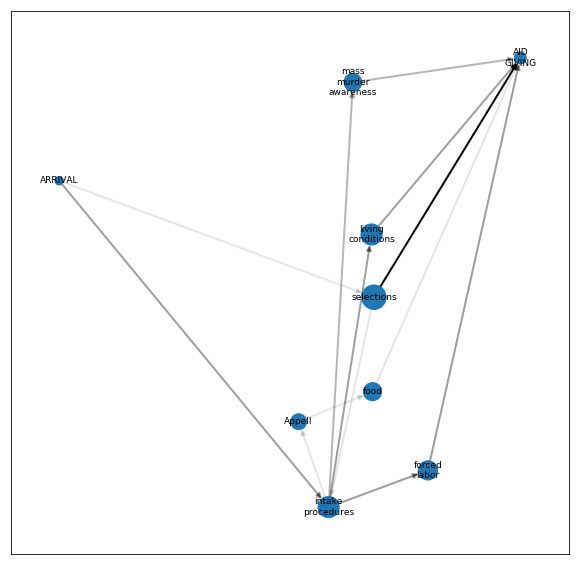

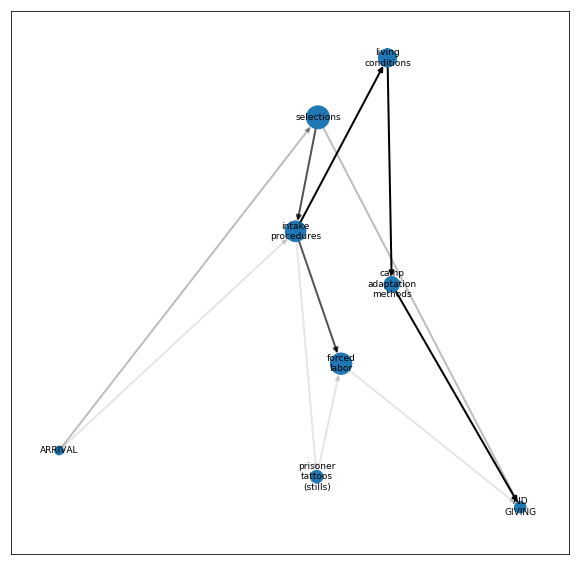

In [12]:
flux = 0.17
visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

In [13]:
story_start = 'living conditions'
story_end = 'aid giving'
state_index = features_df.KeywordLabel.to_list()

In [14]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.3)

Path flux		%path	%of total	path
living conditions-forced labor-aid giving
5.659891762718099
living conditions-selections-aid giving
5.579321783588088
living conditions-aid giving
4.810289578794218
living conditions-mass murder awareness-aid giving
3.4018608735773985
living conditions-camp adaptation methods-aid giving
3.137448696198186
living conditions-food-aid giving
2.8093224765894247
living conditions-selections-intake procedures-aid giving
2.30501423177014
living conditions-social relations-aid giving
1.9491169617220785
living conditions-Appell-aid giving
1.9477545379014614


In [15]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.3)

Path flux		%path	%of total	path
living conditions-forced labor-aid giving
5.922253409428681
living conditions-camp adaptation methods-aid giving
5.055826173947195
living conditions-selections-aid giving
3.8143975585809184
living conditions-aid giving
3.1249235057837894
living conditions-selections-intake procedures-aid giving
2.777665953639259
living conditions-mass murder awareness-aid giving
2.2182439612985085
living conditions-social relations-aid giving
1.8795774994615773
living conditions-prisoner tattoos (stills)-forced labor-aid giving
1.7688316375682842
living conditions-food-selections-intake procedures-housing conditions-aid giving
1.5756767100442737
living conditions-brutal treatment-aid giving
1.5533261959324016
living conditions-selections-intake procedures-forced labor-food acquisition-aid giving
1.4008426158860516


In [16]:
flux=0.17

5 labels to show
5 labels to show


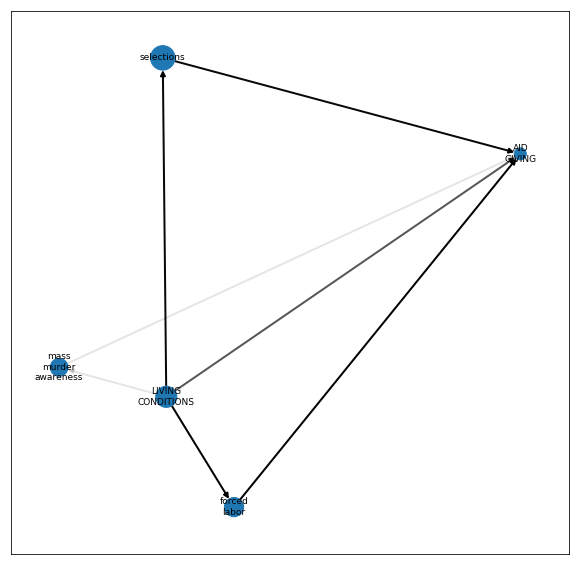

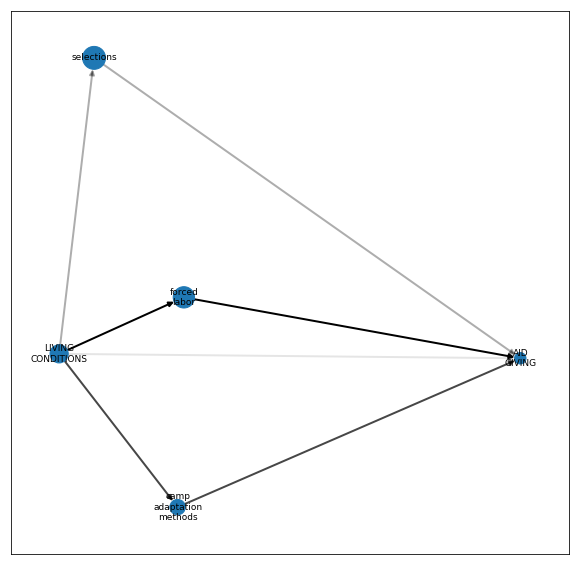

In [17]:
visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

## Observation 2

### Qualitative description

As above, a key topic that follows the discussion of aid giving is forced labour. However, this has different weight in the narratives of men and women. Men are more likely to discuss forced labour following aid giving. By contrast, women are more likely to discuss housing and living conditions.



In [18]:
story_start = 'aid giving'
story_end = 'departure'
flux = 1

In [19]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Path flux		%path	%of total	path
aid giving-selections-departure
7.148195131825777
aid giving-departure
4.349628740435639
aid giving-living conditions-departure
4.0894672846122315
aid giving-camp adaptation methods-departure
3.2262636292820615
aid giving-forced labor-departure
2.872037765965842
aid giving-intake procedures-Appell-food-departure
2.1691707024350286
aid giving-loved ones' separations-intake procedures-living conditions-selections-transfer to camps-departure
2.1524162270971114
aid giving-selections-intake procedures-mass murder awareness-departure
2.1197369400429906
aid giving-Appell-selections-intake procedures-living conditions-transfer procedures-departure
1.9966866455787875
aid giving-Mengele, Josef-intake procedures-living conditions-departure
1.8438294646114313
aid giving-food-selections-transfer procedures-departure
1.7584122384686995
aid giving-social relations-departure
1.6579323225857383
aid giving-loved ones' fates-departure
1.587182306773547
aid giving-family in

In [20]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Path flux		%path	%of total	path
aid giving-selections-intake procedures-living conditions-departure
5.389831147544524
aid giving-selections-departure
3.93321493805307
aid giving-camp adaptation methods-departure
3.855510173948821
aid giving-intake procedures-food-departure
3.4406474300052503
aid giving-forced labor-departure
3.423002704847725
aid giving-departure
2.4017377445037473
aid giving-mass murder awareness-departure
2.164432340960989
aid giving-food-selections-intake procedures-housing conditions-Appell-departure
1.849842304713363
aid giving-loved ones' fates-departure
1.7926657352480482
aid giving-Mengele, Josef-intake procedures-departure
1.6433846184597087
aid giving-living conditions-transfer to camps-departure
1.4704998784338033
aid giving-housing conditions-living conditions-camp adaptation methods-departure
1.3786602696416137
aid giving-forced labor-food acquisition-departure
1.247043610429838
aid giving-prisoner tattoos (stills)-departure
1.2303856289017345
aid giving-f

Calculate for women

In [21]:
result = []

for path in flux_w:
    if len(path.split('aid giving-forced labor-'))>1:
        result.append(flux_w[path])
print (np.array(result).sum())

4.186364236235373


Calculate for men

In [22]:
result = []

for path in flux_m:
    if len(path.split('aid giving-forced labor-'))>1:
        result.append(flux_m[path])
print (np.array(result).sum())

6.167677124509581


In [23]:
result = []

for path in flux_w:
    if len(path.split('aid giving-living conditions-'))>1 or len(path.split('aid giving-housing conditions-'))>1:
        result.append(flux_w[path])
print (np.array(result).sum())

5.326938398334769


Calculate for men

In [24]:
result = []

for path in flux_m:
    if len(path.split('aid giving-living conditions-'))>1 or len(path.split('aid giving-housing conditions-'))>1:
        result.append(flux_m[path])
print (np.array(result).sum())

4.811525976121413


### Visualization

6 labels to show
8 labels to show


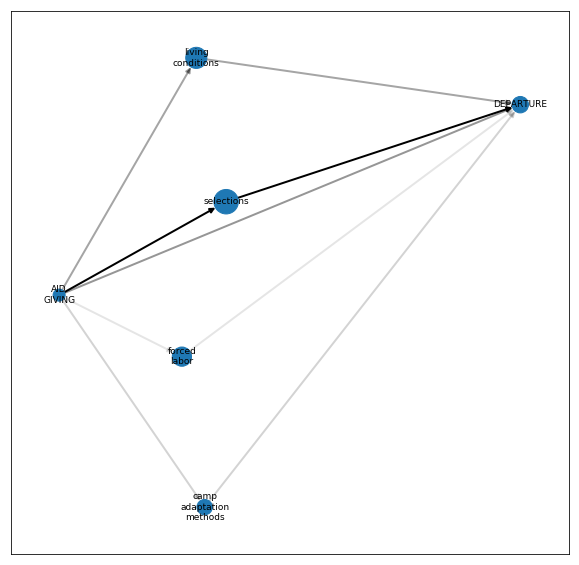

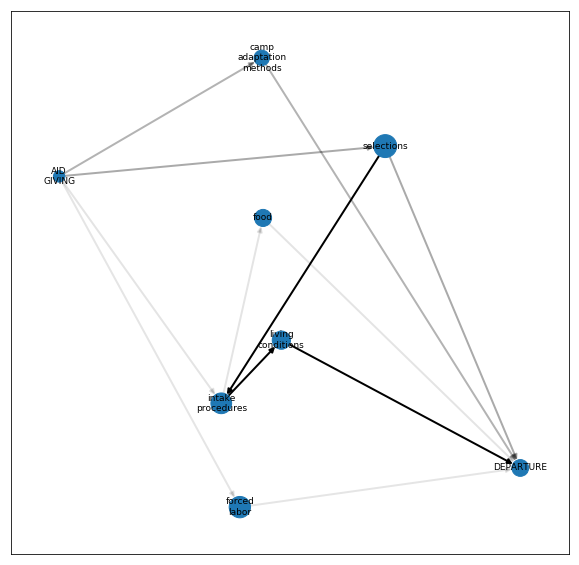

In [25]:
flux = 0.2
visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

## Observation 3

### Qualitative description

Similarly to aid giving, women tend to discuss food sharing in the context of living conditions, whereas men discuss it in the context of forced labour. For women, food sharing is most likely to be primed by the discussion of living conditions, for men food sharing tends to be primed by forced labour. In testimonies of women, the major traffic (16,5%) towards food sharing are going through the following two pathways:
- arrival-camp intake procedures-living conditions-food and thirst-food sharing
- arrival-selections-camp intake procedures-living conditions-food sharing

By contrast, in testimonies of men, the major traffic ( 11.33405389131642%) towards food sharing are going through the following pathways:
- arrival-selections-camp intake procedures-living conditions-forced labor-food sharing




### Visualization

In [26]:
story_start = 'arrival'
story_end = 'food sharing'
flux = 1

In [27]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Path flux		%path	%of total	path
arrival-selections-intake procedures-Appell-food-food sharing
8.565264630129922
arrival-intake procedures-prisoner tattoos (stills)-forced labor-food sharing
7.457924683942491
arrival-selections-intake procedures-living conditions-camp adaptation methods-food sharing
4.462398283433322
arrival-intake procedures-living conditions-selections-food sharing
3.8590081510929735
arrival-loved ones' separations-intake procedures-living conditions-food sharing
3.8175499922402496
arrival-selections-departure-transfer to camps-food sharing
3.1157790107738683
arrival-intake procedures-family interactions-food sharing
2.8839656993755245
arrival-loved ones' separations-intake procedures-forced labor-aid giving-food sharing
2.5539018933672146
arrival-intake procedures-food sharing
1.9674689335249942
arrival-extended family members-food sharing
1.9124680657904467
arrival-selections-intake procedures-housing conditions-food sharing
1.7982935797796495
arrival-loved ones' se

In [28]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Path flux		%path	%of total	path
arrival-selections-intake procedures-forced labor-food sharing
8.637240147789734
arrival-selections-intake procedures-prisoner tattoos (stills)-forced labor-food acquisition-food sharing
6.268925258631713
arrival-intake procedures-food-food sharing
6.065185853483632
arrival-selections-intake procedures-housing conditions-food sharing
4.431854241041068
arrival-intake procedures-prisoner tattoos-forced labor-food sharing
4.3965676217505925
arrival-selections-departure-transfer to camps-food sharing
3.501171395198544
arrival-loved ones' separations-intake procedures-living conditions-camp adaptation methods-departure-food sharing
3.39477551174264
arrival-intake procedures-housing conditions-forced labor-aid giving-food sharing
2.8763047048936983
arrival-selections-intake procedures-living conditions-camp adaptation methods-food sharing
2.6932569827682356
arrival-loved ones' separations-intake procedures-living conditions-social relations-food sharing
2.5113

Calculate the context of living conditions for women

In [29]:
result = []

for path in flux_w:
    if len(path.split('-living conditions-food sharing'))>1 or len(path.split('-housing conditions-food sharing'))>1:
        result.append(flux_w[path])
print (np.array(result).sum())

5.615843572019899


Calculate the context of living conditions for men

In [30]:
result = []

for path in flux_m:
    if len(path.split('-living conditions-food sharing'))>1 or len(path.split('-housing conditions-food sharing'))>1:
        result.append(flux_m[path])
print (np.array(result).sum())

5.668229419194249


Calculate the context of forced labor for women

In [31]:
result = []

for path in flux_w:
    if len(path.split('-forced labor-food sharing'))>1:
        result.append(flux_w[path])
print (np.array(result).sum())

7.945017817039883


Calculate the context of forced labo for men

In [32]:
result = []

for path in flux_m:
    if len(path.split('-forced labor-food sharing'))>1:
        result.append(flux_m[path])
print (np.array(result).sum())

13.033807769540328


Calculate the context of social relation for women

8 labels to show
7 labels to show


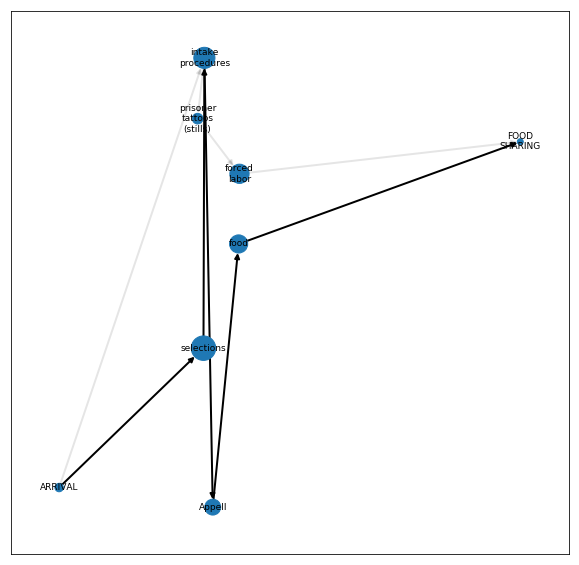

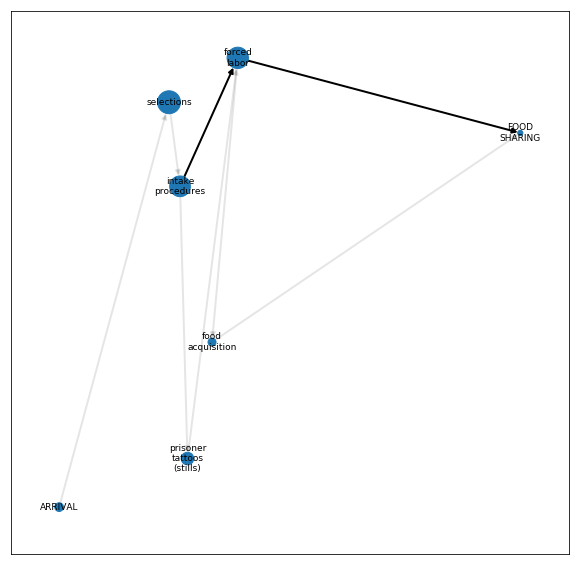

In [33]:
flux = 0.1
visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

## Observation 4

### Qualitative description

In testimonies of men and women, different topics are the ones that are most likely to follow food sharing. The topic that is the most likely to follow food sharing in women testimonies is again living conditions. By contrast men tend to discuss forced labour and selection following food sharing.

### Visualization

In [34]:
story_start = 'food sharing'
story_end = 'departure'
flux = 1

In [35]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Path flux		%path	%of total	path
food sharing-selections-departure
7.109564770379412
food sharing-living conditions-departure
4.649946904429777
food sharing-camp adaptation methods-departure
3.333207931399661
food sharing-forced labor-departure
2.8832182454989455
food sharing-Appell-food-selections-intake procedures-living conditions-transfer procedures-departure
2.5458559420575577
food sharing-departure
2.287610054912715
food sharing-mass murder awareness-departure
2.14706836343779
food sharing-loved ones' fates-departure
1.9457464665617035
food sharing-aid giving-selections-intake procedures-housing conditions-food-departure
1.9178643406694424
food sharing-family interactions-selections-transfer procedures-departure
1.7870584232861497
food sharing-social relations-departure
1.6889489667641506
food sharing-housing conditions-Appell-selections-transfer to camps-departure
1.474095874061923
food sharing-loved ones' fates-intake procedures-Appell-departure
1.4327288731086514
food sharing-M

In [36]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Path flux		%path	%of total	path
food sharing-selections-intake procedures-living conditions-departure
5.229849777040846
food sharing-mass murder awareness-departure
4.097156374479052
food sharing-food-departure
3.6497611042154534
food sharing-forced labor-departure
3.4136309635235036
food sharing-living conditions-camp adaptation methods-departure
3.3297981709679636
food sharing-departure
2.2301686899579765
food sharing-food-selections-departure
2.0405346649875757
food sharing-camp adaptation methods-departure
1.888678381343269
food sharing-intake procedures-housing conditions-Appell-departure
1.6441562696448577
food sharing-social relations-selections-departure
1.5326949726095616
food sharing-transfer to camps-departure
1.5240066418269254
food sharing-living conditions-selections-loved ones' fates-departure
1.521193191618108
food sharing-prisoner tattoos-prisoner tattoos (stills)-forced labor-politico-military event awareness-departure
1.3553973297824697
food sharing-loved ones' final

Calculate for women

In [37]:
result = []

for path in flux_w:
    if len(path.split('food sharing-forced labor-'))>1:
        result.append(flux_w[path])
print (np.array(result).sum())

3.678291008077738


Calculate for men

In [38]:
result = []

for path in flux_m:
    if len(path.split('food sharing-forced labor-'))>1:
        result.append(flux_m[path])
print (np.array(result).sum())

4.609035878994911


In [39]:
result = []

for path in flux_w:
    if len(path.split('food sharing-living conditions-'))>1 or len(path.split('food sharing-housing conditions-'))>1:
        result.append(flux_w[path])
print (np.array(result).sum())

6.124042778491701


Calculate for men

In [40]:
result = []

for path in flux_m:
    if len(path.split('food sharing-living conditions-'))>1 or len(path.split('food sharing-housing conditions-'))>1:
        result.append(flux_m[path])
print (np.array(result).sum())

5.42794041461848


10 labels to show
9 labels to show


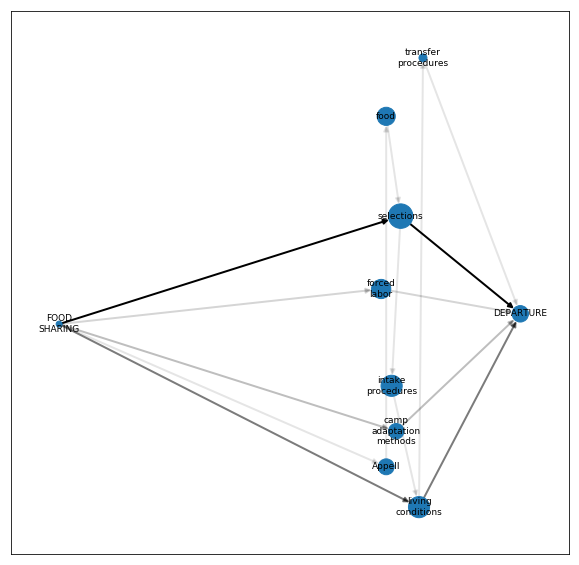

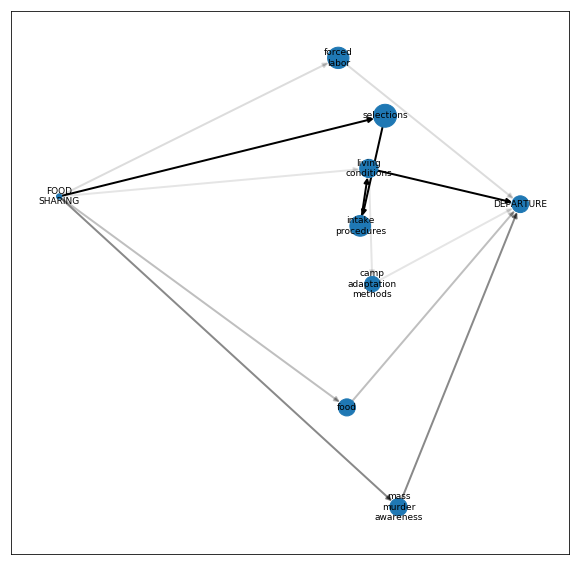

In [41]:
flux = 0.19
visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

## Observation 5

### Qualitative description

In narratives of women, the discussion of friendship tends to be preceded by the discussion of living environments and housing conditions. By contrast, men tend to discuss it in the context of forced labor.


## Visualization

In [42]:
story_start = 'arrival'
story_end = 'friends'
flux = 1
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Path flux		%path	%of total	path
arrival-selections-intake procedures-living conditions-friends
6.29698324124352
arrival-selections-friends
4.943639494444862
arrival-intake procedures-friends
4.454786332001736
arrival-intake procedures-prisoner tattoos (stills)-forced labor-friends
4.267049064443086
arrival-intake procedures-Appell-food-friends
3.6521754359856073
arrival-selections-intake procedures-living conditions-camp adaptation methods-friends
2.738736276568798
arrival-loved ones' separations-intake procedures-mass murder awareness-friends
2.4100199646128404
arrival-loved ones' separations-intake procedures-living conditions-selections-Mengele, Josef-friends
2.3632966893213494
arrival-selections-intake procedures-forced labor-aid giving-friends
2.3149661544891784
arrival-intake procedures-Blockälteste-friends
2.2869574929287424
arrival-loved ones' separations-intake procedures-living conditions-social relations-friends
2.2024815036824283
arrival-selections-intake procedures-clothin

Path flux		%path	%of total	path
arrival-selections-intake procedures-forced labor-friends
4.6297268020911
arrival-selections-friends
4.0404305917777315
arrival-selections-intake procedures-living conditions-friends
3.8401156840020585
arrival-selections-Mengele, Josef-friends
3.7515265333793772
arrival-intake procedures-food-friends
3.428839728156789
arrival-selections-Mengele, Josef-mass murder awareness-friends
3.3897928232465673
arrival-intake procedures-living conditions-camp adaptation methods-friends
3.085338482941113
arrival-intake procedures-prisoner tattoos (stills)-forced labor-politico-military event awareness-friends
3.072621813971877
arrival-selections-intake procedures-prisoner tattoos (stills)-mass murder awareness-psychological reactions-friends
2.482614206130761
arrival-loved ones' separations-intake procedures-friends
2.427105952706672
arrival-intake procedures-prisoner tattoos-friends
2.3360059783973215
arrival-selections-intake procedures-living conditions-social rel

Calculate for women

In [43]:
result = []

for path in flux_w:
    if len(path.split('-forced labor-friends'))>1:
        result.append(flux_w[path])
print (np.array(result).sum())

4.267049064443086


Calculate for men

In [44]:
result = []

for path in flux_m:
    if len(path.split('-forced labor-friends-'))>1:
        result.append(flux_m[path])
print (np.array(result).sum())

0.0


In [45]:
result = []

for path in flux_w:
    if len(path.split('living conditions-friends'))>1 or len(path.split('housing conditions-friends'))>1:
        result.append(flux_w[path])
print (np.array(result).sum())

7.731731432183816


Calculate for men

In [46]:
result = []

for path in flux_m:
    if len(path.split('living conditions-friends'))>1 or len(path.split('housing conditions-friends'))>1:
        result.append(flux_m[path])
print (np.array(result).sum())

5.915735861250798


7 labels to show
7 labels to show


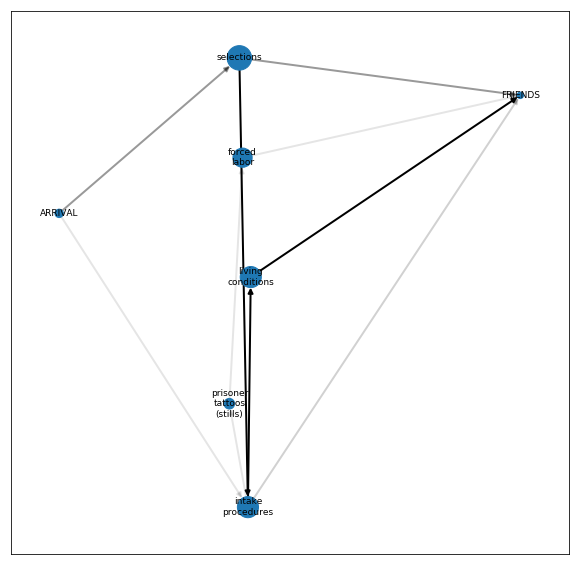

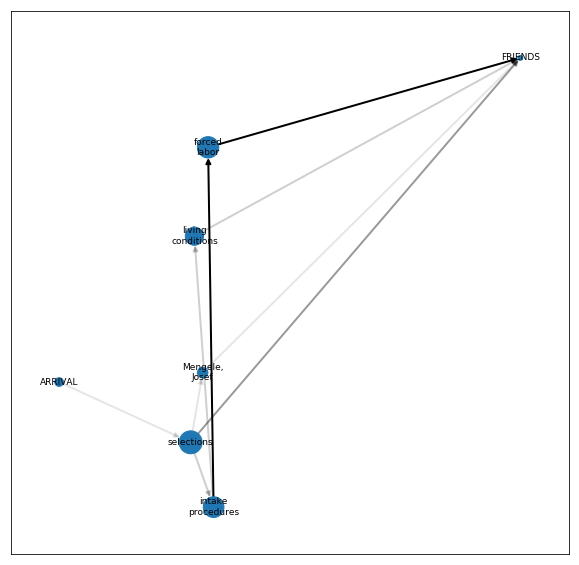

In [47]:
flux = 0.16
visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

## Observation 6

### Qualitative description

In narratives of women, the most immediate topic that follows the discussion of friendship is living conditions; by contrast, in narratives of men, this is forced labour.


## Visualization

In [48]:
story_start = 'friends'
story_end = 'departure'
flux = 1
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)


Path flux		%path	%of total	path
friends-selections-departure
5.483124334789434
friends-living conditions-departure
4.364561255900729
friends-camp adaptation methods-departure
3.46904880134373
friends-forced labor-departure
2.9266054268453368
friends-departure
2.811466953947895
friends-food-selections-intake procedures-living conditions-transfer procedures-departure
2.500569966584569
friends-intake procedures-Appell-food-departure
2.2146200396412077
friends-housing conditions-Appell-selections-transfer to camps-departure
2.166632860440978
friends-Appell-food-selections-intake procedures-mass murder awareness-departure
2.126696501017229
friends-Mengele, Josef-intake procedures-living conditions-selections-transfer procedures-departure
2.098521037837392
friends-social relations-departure
1.9218112295677428
friends-prisoner tattoos (stills)-living conditions-departure
1.601486705319115
friends-aid giving-departure
1.584803976883523
friends-mass murder awareness-selections-departure
1.57929

Path flux		%path	%of total	path
friends-selections-intake procedures-living conditions-departure
5.278540835046292
friends-departure
3.766315717192744
friends-intake procedures-food-departure
3.428177567803959
friends-prisoner tattoos (stills)-forced labor-departure
2.7558800285713287
friends-living conditions-camp adaptation methods-departure
2.5177409515333293
friends-mass murder awareness-departure
2.51594702337594
friends-loved ones' fates-intake procedures-housing conditions-Appell-food-selections-departure
2.4380309351502176
friends-Appell-departure
1.6782783564534314
friends-politico-military event awareness-departure
1.677467840543176
friends-housing conditions-living conditions-selections-departure
1.6742522450931319
friends-transfer to camps-departure
1.500728177505914
friends-camp adaptation methods-departure
1.4693935276193837
friends-social relations-selections-loved ones' fates-departure
1.3514546950862163
friends-survival explanations-departure
1.3226017155802539
friends

Calculate for women

In [49]:
result = []

for path in flux_w:
    if len(path.split('friends-forced labor-'))>1:
        result.append(flux_w[path])
print (np.array(result).sum())

6.066390961741822


Calculate for men

In [50]:
result = []

for path in flux_m:
    if len(path.split('friends-forced labor-'))>1:
        result.append(flux_m[path])
print (np.array(result).sum())

2.5137812933033903


In [51]:
result = []

for path in flux_w:
    if len(path.split('friends-living conditions-'))>1 or len(path.split('friends-housing conditions-'))>1:
        result.append(flux_w[path])
print (np.array(result).sum())

6.636687131254812


Calculate for men

In [52]:
result = []

for path in flux_m:
    if len(path.split('friends-living conditions-'))>1 or len(path.split('friends-housing conditions-'))>1:
        result.append(flux_m[path])
print (np.array(result).sum())

4.191993196626461


6 labels to show
8 labels to show


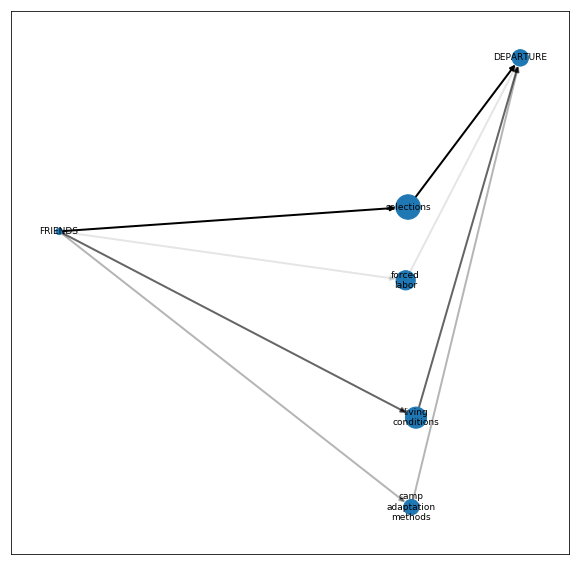

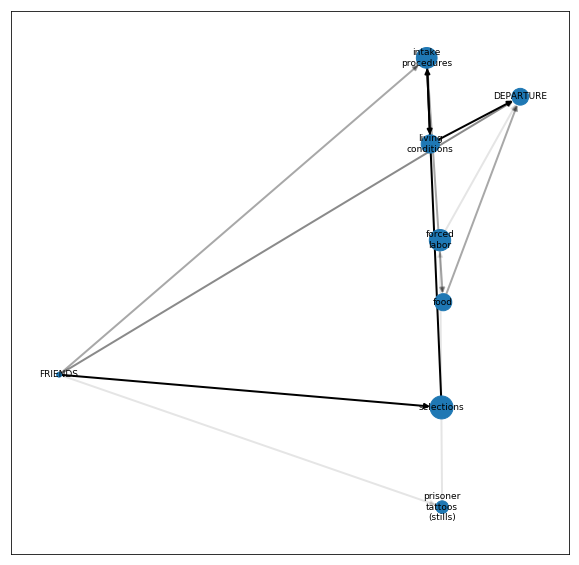

In [53]:
flux = 0.15
visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

## Observation 7

## Qualitative description

If we look at all possible narrative pathways that can connect arrival to and departure from Birkenau, we can see that a significant amount of traffic is going through aid giving  and social bonds. Their significance can be understood if they are compared to Appel. The amount of traffic going through friendship  and food sharing is less significant. 

In case of women, more traffic is going through these nodes, with an exception of aid giving:
	•	social bonds: 3.41 %
	•	aid giving: 2.59 %
	•	friendship: 0.67
	•	food sharing: 0.57 %
In case of men, less traffic is going through these nodes:
	•	social bonds: 2.9 %
	•	aid giving: 2.9 %
	•	friendship: 0.32
	•	food sharing: 0.32 %

#### Total traffic going through them in the complete dataset (men and women):

In [54]:
story_start = 'arrival'
story_end = 'departure'
flux = 1
flux_complete = calculate_flux(data_set_1_complete,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
#flux_complete_dataset_2 = calculate_flux(data_set_2_complete,features_df_2.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)


Path flux		%path	%of total	path
arrival-selections-departure
7.011760279097854
arrival-intake procedures-living conditions-departure
6.038182054457427
arrival-selections-intake procedures-forced labor-departure
2.7346123601151544
arrival-selections-intake procedures-mass murder awareness-departure
2.709564255054102
arrival-intake procedures-Appell-food-departure
2.4494665461337837
arrival-selections-intake procedures-living conditions-transfer procedures-departure
2.0331537841100555
arrival-selections-camp adaptation methods-departure
1.9809973711804667
arrival-selections-transfer procedures-departure
1.9663473753289795
arrival-selections-transfer to camps-departure
1.924200123688917
arrival-intake procedures-living conditions-camp adaptation methods-departure
1.8500131804976068
arrival-loved ones' separations-intake procedures-housing conditions-Appell-departure
1.7885380951353986
arrival-intake procedures-departure
1.5059181200501999
arrival-aid giving-departure
1.3763429816485202
ar

Calculate the total traffic going through social bonds

In [55]:
total_social_bonds = []
total_aid_giving = []
total_appell = []
total_friends = []
total_food_sharing = []
total_escapes = []

In [56]:
for i,element in enumerate(flux_complete):
    if 'social relations' in element.split('-'):
        total_social_bonds.append(flux_complete[element])
print(np.array(total_social_bonds).sum())

2.9754349841095276


Calculate the total traffic going through aid giving

In [57]:
for i,element in enumerate(flux_complete):
    if 'aid giving' in element.split('-'):
        total_aid_giving.append(flux_complete[element])
print(np.array(total_aid_giving).sum())

2.9268501825613438


Calculate the total traffic going through Appell

In [58]:
for i,element in enumerate(flux_complete):
    if 'Appell' in element.split('-'):
        total_appell.append(flux_complete[element])
print(np.array(total_appell).sum())

11.636526105870875


Calculate the total traffic going through escape

In [59]:
for i,element in enumerate(flux_complete):
    if 'escapes' in element.split('-'):
        total_escapes.append(flux_complete[element])
print(np.array(total_escapes).sum())

0.216961249881359


Calculate the total traffic going through friendship

In [60]:
for i,element in enumerate(flux_complete):
    if 'friends' in element.split('-'):
        total_friends.append(flux_complete[element])
print(np.array(total_friends).sum())

0.554500833180875


Calculate the total traffic going through food sharing

In [61]:
for i,element in enumerate(flux_complete):
    if 'food sharing' in element.split('-'):
        total_food_sharing.append(flux_complete[element])
print(np.array(total_food_sharing).sum())

0.3702060958553767


#### Total traffic going through them in the dataset of women

In [62]:
story_start = 'arrival'
story_end = 'departure'
flux = 1
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
#flux_w_dataset_2 = calculate_flux(data_set_2_w,features_df_2.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)


Path flux		%path	%of total	path
arrival-selections-departure
7.838013253109928
arrival-intake procedures-living conditions-departure
6.214400859471374
arrival-selections-intake procedures-forced labor-departure
2.72852375140984
arrival-intake procedures-living conditions-transfer procedures-departure
2.432989859523341
arrival-selections-transfer procedures-departure
2.27288113427382
arrival-intake procedures-Appell-food-departure
2.2320918100829257
arrival-loved ones' separations-intake procedures-mass murder awareness-departure
2.227949896346959
arrival-selections-transfer to camps-departure
2.1700698662122484
arrival-selections-camp adaptation methods-departure
1.9830108875684345
arrival-intake procedures-living conditions-camp adaptation methods-departure
1.5473853875193437
arrival-aid giving-departure
1.4831032179551753
arrival-loved ones' separations-intake procedures-housing conditions-Appell-departure
1.4549952705394278
arrival-Mengele, Josef-departure
1.4431605168027168
arrival

In [63]:
len(flux_w)

642

In [64]:
total_social_bonds = []
total_aid_giving = []
total_appell = []
total_friends = []
total_food_sharing = []

Calculate the total traffic going through social bonds

In [65]:
for i,element in enumerate(flux_w):
    if 'social relations' in element.split('-'):
        total_social_bonds.append(flux_w[element])
print(np.array(total_social_bonds).sum())

3.419102054949206


Calculate the total traffic going through aid giving

In [66]:
for i,element in enumerate(flux_w):
    if 'aid giving' in element.split('-'):
        total_aid_giving.append(flux_w[element])
print(np.array(total_aid_giving).sum())

2.5975293768177883


Calculate the total traffic going through friendship

In [67]:
for i,element in enumerate(flux_w):
    if 'friends' in element.split('-'):
        total_friends.append(flux_w[element])
print(np.array(total_friends).sum())

0.6761351197039123


Calculate the total traffic going through food sharing

In [68]:
for i,element in enumerate(flux_w):
    if 'food sharing' in element.split('-'):
        total_food_sharing.append(flux_w[element])
        #print (element)
        #print (flux_w[element])
print(np.array(total_food_sharing).sum())

0.5791563635169263


#### Total traffic going through them in the dataset of men

In [69]:
story_start = 'arrival'
story_end = 'departure'
flux = 1
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
#flux_m_dataset_2 = calculate_flux(data_set_2_m,features_df_2.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)


Path flux		%path	%of total	path
arrival-selections-intake procedures-living conditions-departure
5.54695378521268
arrival-selections-departure
5.433151639457852
arrival-selections-intake procedures-food-departure
3.576377248980942
arrival-intake procedures-forced labor-departure
3.0657053111100416
arrival-intake procedures-living conditions-camp adaptation methods-departure
3.0224504143104443
arrival-mass murder awareness-departure
2.811404801307263
arrival-selections-camp adaptation methods-departure
2.1692590065758774
arrival-selections-intake procedures-Appell-departure
2.086704578322498
arrival-intake procedures-departure
1.8843105884738571
arrival-selections-loved ones' fates-departure
1.8283123548659954
arrival-selections-transfer to camps-departure
1.49787934765497
arrival-intake procedures-mass murder awareness-departure
1.3300371950138796
arrival-loved ones' separations-intake procedures-prisoner tattoos (stills)-departure
1.292271323649743
arrival-intake procedures-prisoner t

In [70]:
total_social_bonds = []
total_aid_giving = []
total_appell = []
total_friends = []
total_food_sharing = []



Calculate the total traffic going through social bonds

In [71]:
for i,element in enumerate(flux_m):
    if 'social relations' in element.split('-'):
        total_social_bonds.append(flux_m[element])
print(np.array(total_social_bonds).sum())

2.982008505392785


Calculate the total traffic going through aid giving

In [72]:
for i,element in enumerate(flux_m):
    if 'aid giving' in element.split('-'):
        total_aid_giving.append(flux_m[element])
print(np.array(total_aid_giving).sum())

2.9375696707416115


Calculate the total traffic going through friendship

In [73]:
for i,element in enumerate(flux_m):
    if 'friends' in element.split('-'):
        total_friends.append(flux_m[element])
print(np.array(total_friends).sum())

0.32837556435396037


Calculate the total traffic going through food sharing

In [74]:
total_food_sharing = []

In [75]:
for i,element in enumerate(flux_m):
    if 'food sharing' in element.split('-'):
        #print (element)
        #print (flux_m[element])
        total_food_sharing.append(flux_m[element])
print(np.array(total_food_sharing).sum())

0.32400630994286045


## Observation 8

### Qualitative Description

In testimonies of women there are important narrative pathways that lead to the discussion of survival explanations and involve social bonds  as states preceding survival explanations; in testimonies of men such paths have significantly less traffic. We can see a similar pattern with friends.

In [76]:
story_start = 'arrival'
story_end = 'survival explanations'

In [77]:
flux = 1
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Path flux		%path	%of total	path
arrival-selections-survival explanations
5.538730336289726
arrival-intake procedures-living conditions-survival explanations
3.933057329061107
arrival-selections-intake procedures-prisoner tattoos (stills)-forced labor-survival explanations
3.4547618857397366
arrival-intake procedures-mass murder awareness-survival explanations
3.3335547332469253
arrival-selections-intake procedures-Appell-survival explanations
3.0433079422702587
arrival-intake procedures-living conditions-camp adaptation methods-survival explanations
2.777112419411017
arrival-loved ones' separations-intake procedures-family interactions-survival explanations
2.7402728129797507
arrival-intake procedures-living conditions-selections-Mengele, Josef-survival explanations
2.4294154317444687
arrival-selections-intake procedures-living conditions-social relations-survival explanations
2.4094781452618705
arrival-loved ones' separations-intake procedures-housing conditions-Appell-food-selections

Path flux		%path	%of total	path
arrival-selections-survival explanations
5.993855074788803
arrival-selections-loved ones' fates-survival explanations
4.048687151602983
arrival-selections-departure-survival explanations
3.9463337643602285
arrival-intake procedures-forced labor-survival explanations
3.3994568468426762
arrival-selections-intake procedures-living conditions-survival explanations
3.060252521548856
arrival-intake procedures-living conditions-camp adaptation methods-departure-forced march conditions-survival explanations
2.3869382191479205
arrival-selections-intake procedures-food-survival explanations
2.2487148818605514
arrival-intake procedures-living conditions-departure-transfer conditions-survival explanations
2.2204779368362453
arrival-selections-intake procedures-prisoner tattoos (stills)-survival explanations
1.9311476524332283
arrival-intake procedures-prisoner tattoos (stills)-forced labor-aid giving-survival explanations
1.8596838499689967
arrival-mass murder aware

Find social bonds in women narratives

In [78]:
result = []
for path in flux_w:
    if len(path.split('-social relations-survival explanations'))>1 or len(path.split('-friends-survival explanations'))>1:
        print (path)
        print (flux_w[path])
        result.append(flux_w[path])
        print ('\n')
print (np.array(result).sum())

arrival-selections-intake procedures-living conditions-social relations-survival explanations
2.4094781452618705


arrival-loved ones' final contacts-intake procedures-living conditions-friends-survival explanations
0.7272280707686144


arrival-corpse cremations-living conditions-selections-intake procedures-friends-survival explanations
0.12710280171190882


arrival-interviewee original works-Holocaust-related psychological reactions-food-selections-intake procedures-friends-survival explanations
0.025268077597446377


arrival-deportation sanitary conditions-German soldiers-intake procedures-friends-survival explanations
0.004409786870354262


3.293486882210194


Find aid giving in women narratives

In [79]:
result = []
for path in flux_w:
    if len(path.split('-aid giving-survival explanations'))>1 or len(path.split('-food sharing-survival explanations'))>1:
        print (path)
        print (flux_w[path])
        result.append(flux_w[path])
        print ('\n')
print (np.array(result).sum())

arrival-intake procedures-forced labor-aid giving-survival explanations
1.7421694782366328


arrival-friends-Roma prisoners-selections-intake procedures-housing conditions-food-food sharing-survival explanations
0.18753781524119173


arrival-Soviet armed forces-Soviet soldiers-loved ones' fates-intake procedures-food-food sharing-survival explanations
0.011760231668718013


arrival-Jewish persecution bystander responses-selections-intake procedures-food-food sharing-survival explanations
0.002463802571388784


1.9439313277179313


Find social bonds in men narratives

In [80]:
result = []
for path in flux_m:
    if len(path.split('-social relations-survival explanations'))>1 or len(path.split('-friends-survival explanations'))>1:
        print (path)
        print (flux_m[path])
        result.append(flux_m[path])
        print ('\n')
print (np.array(result).sum())

arrival-departure-freight trains-intake procedures-food-selections-medical experiments-post-conflict medical problems-friends-survival explanations
0.5266860163132774


arrival-prisoner functionaries-selections-intake procedures-living conditions-social relations-survival explanations
0.25073048392899866


arrival-German camp guards-food-selections-intake procedures-living conditions-social relations-survival explanations
0.07726313583140505


arrival-Jewish religious observances-selections-intake procedures-living conditions-food-friends-survival explanations
0.03559698338071385


arrival-brutal treatment-Appell-selections-intake procedures-social relations-survival explanations
0.00939147079097037


arrival-Jewish prisoner functionaries-selections-intake procedures-Lagerälteste-friends-survival explanations
0.002822954671922554


arrival-Polish prisoners-food-Mengele, Josef-intake procedures-social relations-survival explanations
0.0018165444390019995


0.9043075893562899


Find aid giving in men narratives

In [81]:
result = []
for path in flux_m:
    if len(path.split('-aid giving-survival explanations'))>1 or len(path.split('-food sharing-survival explanations'))>1:
        print (path)
        print (flux_m[path])
        result.append(flux_m[path])
        print ('\n')
print (np.array(result).sum())

arrival-intake procedures-prisoner tattoos (stills)-forced labor-aid giving-survival explanations
1.8596838499689967


arrival-clothing-housing conditions-Appell-forced labor-food sharing-survival explanations
0.035658789560868556


arrival-Jewish persecution bystander responses-transfer adaptation methods-camp procedures-forced labor-food sharing-survival explanations
0.004689420132265177


arrival-SS/SD personnel-selections-intake procedures-prisoner tattoos-forced labor-food sharing-survival explanations
0.00038239593865748654


1.900414455600788


## Visualize


Notice that social bonds are "missing" from the plot showing men

14 labels to show
13 labels to show


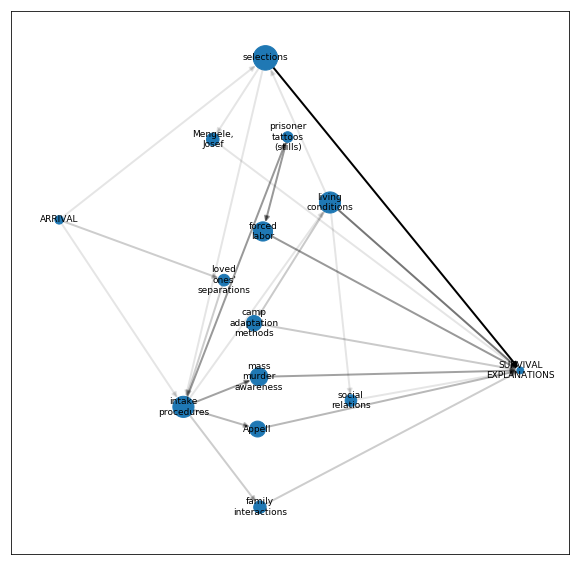

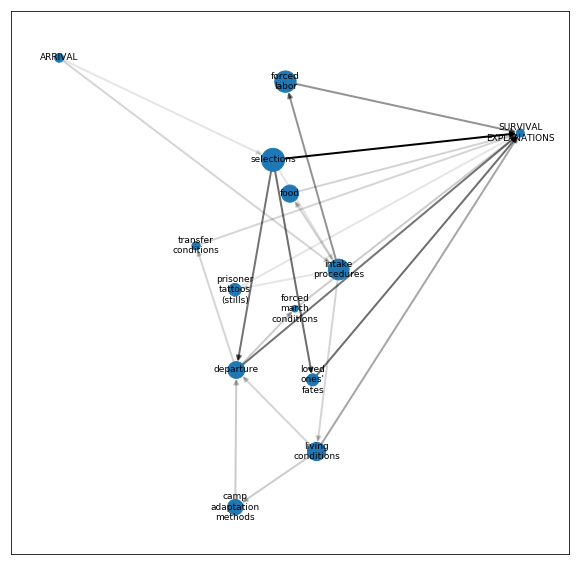

In [82]:
flux = 0.29
visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

## Observation 9

### Qualitative description

The moment when one particularly needed the help of others was the selection, when the ill and those who were unable to work were selected to be sent to gas chambers. In testimonies we can often read that victims helped each other in these moments (for instance by hiding or holding the ill); yet victims attribute their survival of selections to the help of their peers and friends. This narrative frame corresponds to the following narrative pathways:
- selections-social relations-survival explanations
- selections-friends-survival explanations
- selections-aid giving-survival explanations

These narrative pathways are more significant in testimonies of women than men.


### Visualization

In [83]:
story_start = 'selections'
story_end = 'survival explanations'
flux = 1
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Path flux		%path	%of total	path
selections-survival explanations
5.862530757392997
selections-intake procedures-living conditions-survival explanations
3.9278885622778725
selections-mass murder awareness-survival explanations
3.3305195031393113
selections-intake procedures-Appell-survival explanations
2.816871860759943
selections-camp adaptation methods-survival explanations
2.7875583580484844
selections-forced labor-survival explanations
2.594421489444848
selections-Mengele, Josef-survival explanations
2.4145301851300904
selections-departure-transfer to camps-survival explanations
2.0224224391772463
selections-intake procedures-living conditions-departure-survival explanations
1.7468040316961662
selections-family interactions-survival explanations
1.53168571622038
selections-aid giving-survival explanations
1.2889701818130312
selections-intake procedures-housing conditions-Appell-food-survival explanations
1.2491821647397419
selections-intake procedures-survival explanations
1.1495699

Path flux		%path	%of total	path
selections-survival explanations
6.484281761855094
selections-forced labor-survival explanations
3.0892255837976035
selections-intake procedures-living conditions-survival explanations
3.054895724881775
selections-loved ones' fates-survival explanations
2.690997714478873
selections-departure-survival explanations
2.649505071458339
selections-camp adaptation methods-departure-forced march conditions-survival explanations
2.329584292396444
selections-intake procedures-food-survival explanations
2.2414855873980692
selections-living conditions-departure-transfer conditions-survival explanations
1.951097262794243
selections-intake procedures-prisoner tattoos (stills)-survival explanations
1.9253946578870842
selections-transfer to camps-survival explanations
1.6196881553548577
selections-intake procedures-living conditions-camp adaptation methods-survival explanations
1.5955985500504448
selections-intake procedures-prisoner tattoos-survival explanations
1.4019

18 labels to show
16 labels to show


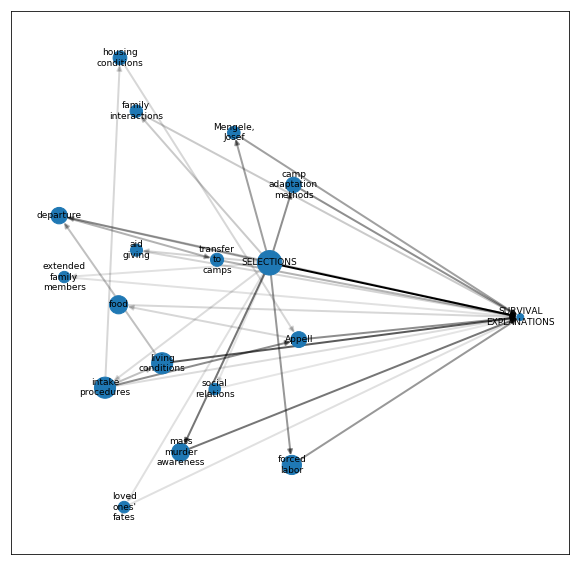

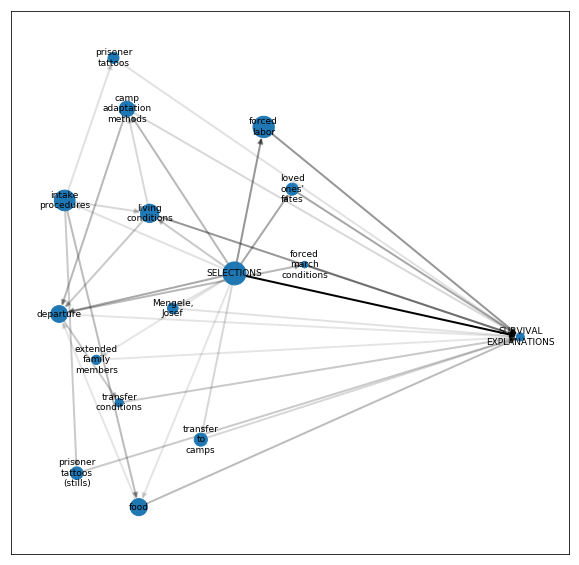

In [84]:
flux = 0.35
visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

Find social bonds as transitionary topic between selection and survival explanation in narratives of women

In [85]:
total = []
for path in flux_w:
    if (len(path.split('-social relations-survival explanations'))>1 or len(path.split('-friends-survival explanations'))>1):
        if len(path.split('-'))==3:
            print (path)
            print (flux_w[path])
            total.append(flux_w[path])
            print ('\n')
print (np.array(total).sum())

selections-social relations-survival explanations
0.9221954912445222


selections-friends-survival explanations
0.3575149406589147


1.279710431903437


Find social bonds as transitionary topic between selection and survival explanation in narratives of men

In [86]:
total = []
for path in flux_m:
    if (len(path.split('-social relations-survival explanations'))>1 or len(path.split('-friends-survival explanations'))>1):
        if len(path.split('-'))==3:
            print (path)
            print (flux_m[path])
            total.append(flux_m[path])
            print ('\n')
print (np.array(total).sum())

selections-friends-survival explanations
0.19536034245779738


0.19536034245779738


Find aid giving as transitionary topic between selection and survival explanation in narratives of women

In [87]:
total = []
for path in flux_w:
    if (len(path.split('-aid giving-survival explanations')))>1:
        if len(path.split('-'))==3:
            print (path)
            print (flux_w[path])
            total.append(flux_w[path])
            print ('\n')
print (np.array(total).sum())

selections-aid giving-survival explanations
1.2889701818130312


1.2889701818130312


Find aid giving as transitionary topic between selection and survival explanation in narratives of men

In [88]:
total = []
for path in flux_m:
    if (len(path.split('-aid giving-survival explanations')))>1:
        if len(path.split('-'))==3:
            print (path)
            print (flux_m[path])
            total.append(flux_m[path])
            print ('\n')
print (np.array(total).sum())

selections-aid giving-survival explanations
0.9195821121373924


0.9195821121373924


## Interpretation

The main context of solidarity for women was the barack, i.e. the everyday living environment. By contrast, for men solidarity was rather connected with forced labour and the working environment. Therefore, women and men remember about acts of solidarity in different contexts, which also suggests that they took place in different contexts in the past.

We can see a similar pattern with social activity. Women discuss it in the context of the living environment, whereas man discuss it in the context of work environment.

Generally, speaking if we look at the amount of traffic going through social activity and solidarity, we can see that in case of  women more traffic is going towards solidarity and social activity. 

What also illustrates the different role of solidarity and sociability for men and women is that women are likely to attribute their survival to them